# Lab | Customer Analysis Round 2

For this lab, we will be using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder. Check out the `files_for_lab/about.md` to get more information if you are using the Online Excel.

**Note**: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

In [1]:
import pandas as pd
import numpy as np

## BONUS from lab1 

#### Put all the previously mentioned data transformations into a function.

In [2]:
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')



def lab2(f):
    f.columns = [col.lower().replace(" ", "_") for col in f.columns] #Standardize Columns

    #NVULL 

    f['state'] = f['state'].fillna('California')
    f['number_of_open_complaints'] = f['number_of_open_complaints'].fillna(0)
    f['vehicle_size'] =  f['vehicle_size'].fillna('Medsize')
    f['vehicle_class'] = f['vehicle_class'].fillna('Four-Door Car')
#     f['vehicle_type'] = f['vehicle_type'].fillna('A') 
    
#     #DATE

    f['effective_to_date'] = pd.to_datetime(f['effective_to_date'], errors ="coerce")
    f['month'] = [item.month for item in f['effective_to_date']]
    
    db_1qu = f[(f['month'] < 4)]

    return f

df = lab2(file)

df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


## Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.


##### Show DataFrame info.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

##### Describe DataFrame.

In [4]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


##### Show a plot of the total number of responses.



In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df['response'].describe()

count     9134
unique       2
top         No
freq      7826
Name: response, dtype: object

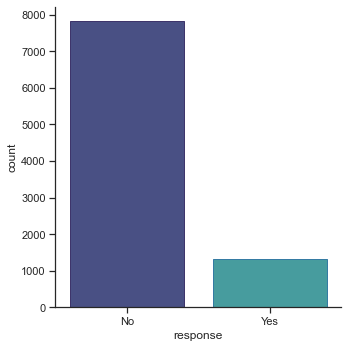

In [6]:


plot_data = pd.DataFrame(df['response'].value_counts())
plot_data = plot_data.reset_index()
plot_data.columns = ['response', 'count']

responses = (df['response'].value_counts()).to_dict()
x_values = responses.keys()
y_values = responses.values()
y_values
x_values

sns.set_theme(style="ticks")

sns.catplot(x="response", y="count", kind="bar", data = plot_data, palette="mako", edgecolor=sns.color_palette("mako", 3))


#### FUNCTIONS FOR THE FOLLOWING 3 EXERCISES

In [37]:
# x = column for which the response rate is calculated
# y = if using numerical values set amount of quartile you want to show the response rate for
# set y for 'income' and 'total amount claimed' - preferably to 4 or 10
    

def calculate_response_rate (x, y = None): #y is optional. if not given, the function will group by all unique df[x] values
    
    df2 = pd.DataFrame(df['response'])
    df1 = pd.DataFrame(df[x])
    df_conc = pd.concat([df1, df2], axis = 1)
    
     
    
    #convert 'No', 'Yes' to 0, 1 & add it to df
    
    res_calc = [1 if df_conc['response'][i] == 'Yes' 
                else 0 for i in range(len(df_conc['response']))]    
    df_conc['res_calc'] =  pd.DataFrame(res_calc)
    
    #rank the x columne to fix the qcut error: same value can not be in several bins:  
    
    df_conc['rank'] = df_conc[x].rank(method='first')
    
    #if a quartile value is given group the x variable according to the chosen number
    
    if y != None:        
                    # if x shall be grouped by quantiles specific labels will be shown
        
        if y == 4:
            df_conc['groups'] = pd.qcut(df_conc['rank'], # pd.qcut & pd.cut
            y, precision = 1, labels = ['0-25%', '25-50%', '50-75%', '75-100%'])
        
                    # if x shall be grouped by quartiles of 10 specific labels will be shown
        
        elif y == 10:
            df_conc['groups'] = pd.qcut(df_conc['rank'], y, precision = 1,
            labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', 
                      '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
        
                    # if x shall be grouped by any other number of quartiles no specific lables will be shown
        
        else: 
            df_conc['groups'] = pd.qcut(df_conc['rank'], y, precision = 1)
            
        
        # if a grouping value is given, the total answers per group is calculated:
        
        total_answ = df_conc.groupby('groups')['groups'].count() # pd series       
        yes_sum = (df_conc.groupby('groups')['res_calc'].sum()) # count of yes answeres per group = pd series
   

    # if no grouping value is given: 
    
    else:
        
        df_conc[x] = df_conc[x].astype(str) #converting df[x] to string to avoid an error message while plotting
        total_answ = df_conc.groupby(x)[x].count() #toal answers per group is calculated = pd series  
        yes_sum = (df_conc.groupby(x)['res_calc'].sum()) #count of yes answeres per group = pd series
        
      
    #continue with general code after if, else:   
    
    yes = [yes_sum[i] for i in range(len(yes_sum))] #create list of yes counts from pd series
    
    groups = yes_sum.index.to_list() #create list of the groups
    
    total_answ = [total_answ[i] for i in range(len(total_answ))] #create list of total answeres per group
    
    
    # calculate response rate from the lists above 
    
    res_rate = list((np.array(yes)/np.array(total_answ))*100) #devide np.arrays and save as a list
    res_rate = [round(i, 2) for i in res_rate] #rounding the response rate to 2 comma 
    
    
    #create df of response rate per x value group
    
    df_r = pd.DataFrame(res_rate)  #turn responserate and groups into dfs to concat
    df_gr = pd.DataFrame(groups)        
    df_res_rate = pd.concat([df_gr, df_r], axis = 1)    
    df_res_rate.columns = ['groups', 'response_rate_%'] #set df columns
                
    display(df_res_rate)
    return df_res_rate


# Functions for sns plots: title can be set if wished. Title is optional

def plot1_horizontal (df, title=""):
        sns.barplot(x='response_rate_%', y='groups', palette="mako", data = df).set(title=title)

def plot2_bar(df, title=""):
        sns.barplot(x='groups', y='response_rate_%', data = df, palette="mako").set(title=title)



##### Show a plot of the response rate by the sales channel.

,groups,response_rate_%
0,Agent,19.15
1,Branch,11.45
2,Call Center,10.88
3,Web,11.77


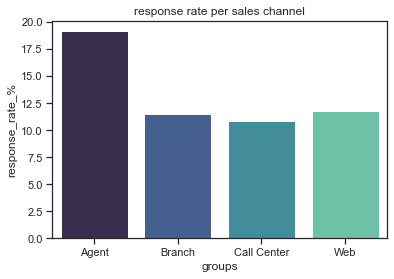

In [38]:
df1 = calculate_response_rate('sales_channel') #no grouping value needed, since it is a categorial value

plot2_bar(df1, title= "response rate per sales channel")

##### Show a plot of the response rate by the total claim amount.

,groups,response_rate_%
0,0-10%,9.19
1,10-20%,9.86
2,20-30%,9.97
3,30-40%,18.93
4,40-50%,15.77
5,50-60%,15.77
6,60-70%,19.15
7,70-80%,19.61
8,80-90%,13.80
9,90-100%,11.16


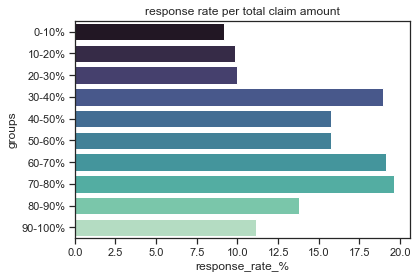

In [42]:

df2 = calculate_response_rate('total_claim_amount', 10) #grouping value makes sense in order to gain meaningful information

plot1_horizontal(df2, title = "response rate per total claim amount")


##### Show a plot of the response rate by income.

,groups,response_rate_%
0,0-10%,7.88
1,10-20%,9.64
2,20-30%,17.96
3,30-40%,22.65
4,40-50%,14.79
5,50-60%,14.79
6,60-70%,10.94
7,70-80%,17.63
8,80-90%,15.77
9,90-100%,11.16


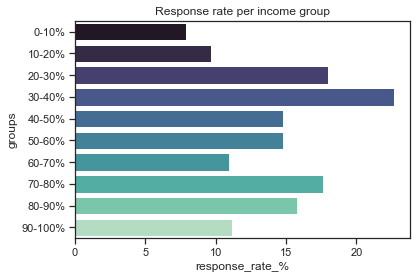

In [33]:
df_res_rate = calculate_response_rate ('income', 10) # I am using a quartile 1
df_res_rate

plot1_horizontal(df_res_rate, title="Response rate per income group")

### Testing some more

##### per eduction level 

,groups,response_rate_%
0,Bachelor,13.76
1,College,15.22
2,Doctor,17.54
3,High School or Below,13.04
4,Master,16.19


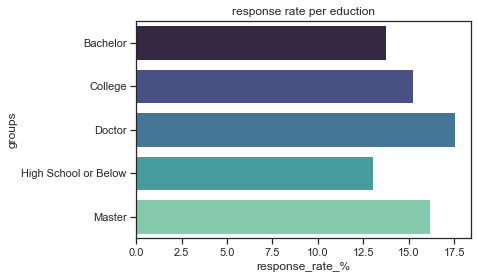

In [34]:
df_res_rate = calculate_response_rate ('education')
df_res_rate

plot1_horizontal(df_res_rate, title = "response rate per eduction")

##### per state

,groups,response_rate_%
0,Arizona,14.27
1,California,14.48
2,Nevada,14.06
3,Oregon,14.46
4,Washington,13.66


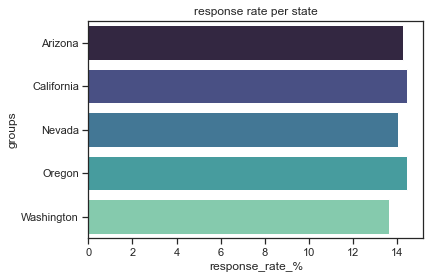

In [35]:
df_res_rate = calculate_response_rate ('state')
plot1_horizontal(df_res_rate, "response rate per state")

##### per month

,groups,response_rate_%
0,1,15.43
1,2,13.03


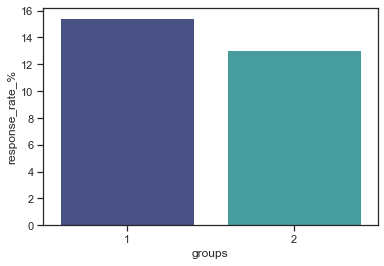

In [36]:
df_res_rate = calculate_response_rate ('month')
plot2_bar(df_res_rate)